In [19]:
import numpy as np
import pandas as pd
import joblib as jb
import seaborn as sns

#The Machine learning alogorithm
from sklearn.ensemble import RandomForestClassifier

# Test train split
from sklearn.model_selection import train_test_split







In [20]:
data = pd.read_csv("train.csv")
td = pd.concat([data], ignore_index=True, sort = False)
data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Text(0.5, 1.0, 'Missing values heatmap')

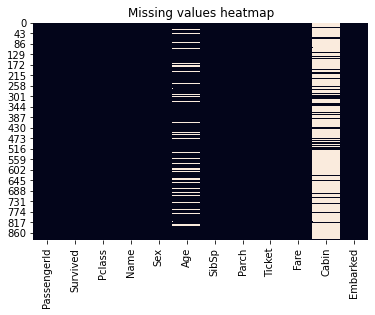

In [21]:
td.isnull().sum()
sns.heatmap(td.isnull(), cbar = False).set_title("Missing values heatmap")

In [22]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [23]:
median_age = data['Age'].median()
data['Age'].fillna(median_age, inplace = True)


In [24]:
data_inputs = data[['Pclass','Sex', 'Age']]
data_inputs.head()

,Pclass,Sex,Age
0,3,male,22.0
1,1,female,38.0
2,3,female,26.0
3,1,female,35.0
4,3,male,35.0


In [25]:
data_inputs["Sex"] = np.where(data_inputs["Sex"] == "female", 0, 1)
data_inputs.head()

,Pclass,Sex,Age
0,3,1,22.0
1,1,0,38.0
2,3,0,26.0
3,1,0,35.0
4,3,1,35.0


In [26]:
expected_output = data[["Survived"]]
expected_output.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [32]:
inputs_train, inputs_test, expected_output_train, expected_output_test   = train_test_split (data_inputs, expected_output, test_size = 0.33, random_state = 45)

print(inputs_train.head())
print(expected_output_train.head())

     Pclass  Sex   Age
126       3    1  28.0
369       1    0  24.0
61        1    0  38.0
812       2    1  35.0
182       3    1   9.0
     Survived
126         0
369         1
61          1
812         0
182         0


In [33]:
rf = RandomForestClassifier (n_estimators=100)


In [34]:
rf.fit(inputs_train, expected_output_train)

<ipython-input-34-7d813089c01c>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(inputs_train, expected_output_train)


RandomForestClassifier()

In [35]:
accuracy = rf.score(inputs_test, expected_output_test)
print("Accuracy = {}%".format(accuracy * 100))

Accuracy = 82.37288135593221%


In [31]:
jb.dump(rf, "titanic_model2", compress=9)

['titanic_model2']

In [884]:
#data['SibSp'].fillna(0, inplace = True)

In [882]:
#faremoda = data['Fare'].mode()
#data['Fare'].fillna(faremoda, inplace = True)

In [9]:
#data['Embarked'].fillna(3, inplace = True)
#data["Embarked"].replace("S", 3, inplace = True)
#data["Embarked"].replace("Q", 2, inplace = True)
#data["Embarked"].replace("C", 1, inplace = True)
#data['Embarked'].head()
